<a href="https://colab.research.google.com/github/LakshmiAhala/DataScience/blob/main/DS_MidtermProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Necessary Libraries

In [1]:
#@title Importing the libraries

!pip install squarify
import squarify
import requests
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sb
from bs4 import BeautifulSoup
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

#Extracting the Quotes

In [2]:
#@title Web Scraping Quotes

# Running a loop to scrape all the quotes
quotes = []
for page_num in range(1, 11):
    url = f"http://quotes.toscrape.com/page/{page_num}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    quote_elements = soup.find_all("div", class_="quote")
    for quote_element in quote_elements:
        text = quote_element.find("span", class_="text").text
        author = quote_element.find("small", class_="author").text
        quotes.append({"Quote": text, "Author": author})

# Printing the output in the form of a dataframe
webscraping_quotes = pd.DataFrame(quotes)
# display(webscraping_quotes.head())
webscraping_quotes['Quote'] = webscraping_quotes['Quote'].str.replace('“', '')
webscraping_quotes['Quote'] = webscraping_quotes['Quote'].str.replace('”', '')
display(webscraping_quotes.head())


,Quote,Author
0,The world as we have created it is a process o...,Albert Einstein
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling
2,There are only two ways to live your life. One...,Albert Einstein
3,"The person, be it gentleman or lady, who has n...",Jane Austen
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe


In [3]:
#@title Fetching quotes via REST API


# Initializing the variables
qa_dict = {}

# Looping 256 times to get the quote and author using REST API
for item in range(256):
  response = requests.get(f'https://favqs.com/api/qotd')
  json_response = json.loads(response.text)
  quote = json_response['quote']['body']
  author = json_response['quote']['author']
  # print('Quote: ' + quote, '-->' ' Author: ' + author)

  # Converting the string to a dictionary
  qa_dict[quote] = author

# Printing the output in the form of a dataframe
dataframe_json = pd.DataFrame(list(qa_dict.items()), columns=['Quote', 'Author'])
dataframe_json.head()


,Quote,Author
0,Bring a timer.,Steve Jobs
1,I would believe only in a God that knows how t...,Friedrich Nietzsche
2,The best place to learn ethics is in the home.,Warren Buffett
3,"Obstacles Can't Stop You, Problems Can't Stop ...",Jeffrey Gitomer
4,Take a simple idea and take it seriously.,Charlie Munger


In [4]:
#@title Processing Local Quotes File

# Reading the contents of the file
filepath = r"/content/quotes1.csv";
quote_data = pd.read_csv(filepath)

# Getting the row count and the coloumn count to doublecheck if all the text has been processed or not

row_count = len(list(quote_data.axes[0]))
column_count = len(list(quote_data.axes[1]))
# print("Row count: " + str(row_count))
# print("Column count: " + str(column_count))

# Printing the output in the form of a dataframe
quote_data.head()


,Author,Quote
0,Walt Disney,"All our dreams can come true, if we have the c..."
1,Eleanor Roosevelt,The future belongs to those who believe in the...
2,John Updike,"Dreams come true. Without that possibility, na..."
3,James Dean,Dream as if you'll live forever. Live as if yo...
4,George Bernard Shaw,Some men see things as they are and say why. I...


# Combining

In [5]:
#@title Combining all the DataFrames

# Combining all three dataframes to form one big dataframe (with duplicates)
joined_df_with_dups = pd.concat([quote_data, dataframe_json, webscraping_quotes],
                                ignore_index=True)
# display(joined_df_with_dups)

# Removing all the duplicates to form the final dataframe
combined_df_final = joined_df_with_dups.drop_duplicates(subset=['Quote'])
display(combined_df_final)


,Author,Quote
0,Walt Disney,"All our dreams can come true, if we have the c..."
1,Eleanor Roosevelt,The future belongs to those who believe in the...
2,John Updike,"Dreams come true. Without that possibility, na..."
3,James Dean,Dream as if you'll live forever. Live as if yo...
4,George Bernard Shaw,Some men see things as they are and say why. I...
...,...,...
340,Harper Lee,You never really understand a person until you...
341,Madeleine L'Engle,You have to write the book that wants to be wr...
342,Mark Twain,Never tell the truth to people who are not wor...
343,Dr. Seuss,"A person's a person, no matter how small."


#Answering the Given Questions

In [6]:
#@title Q1. How many total quotes are there in the final collection?

# Using pandas to get the row and coloumn count
rows, coloumns = combined_df_final.shape

# Printing the number of quotes (subtracting 1 as the header counts as a row)
print("Total number of quotes: " + str(rows))

Total number of quotes: 342


In [7]:
#@title Q2. Who are the top 3 frequently quoted authors? If there are more than 3, you can show any random 3.

author_counts = combined_df_final['Author'].value_counts()
top_3_authors = author_counts.head(3)
print("Top 3 frequently quoted authors:", '\n')
print(top_3_authors)

Top 3 frequently quoted authors: 

Author
Albert Einstein        14
Ralph Waldo Emerson     9
Mark Twain              9
Name: count, dtype: int64


In [8]:
#@title Q3. How many quotes are by Gandhi?

count_of_gandhi = combined_df_final['Author'].value_counts().get('Mahatma Gandhi', 0)
print("Number of quotes by Gandhi: " + str(count_of_gandhi))

Number of quotes by Gandhi: 4


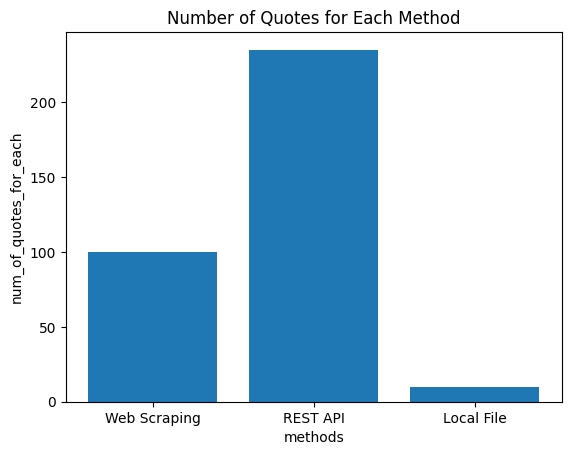

In [9]:
#@title Q4. Create a bar chart showing the count of quotes from each source

# Number of quotes through Web Scraping
num_webscraping = webscraping_quotes.shape[0]
# print('Number of quotes through Web Scraping: ', num_webscraping)

# Number of quotes through REST API
num_restapi = dataframe_json.shape[0]
# print('Number of quotes through REST API: ', num_restapi)

# Number of quotes through Local File
num_localfile = quote_data.shape[0]
# print('Number of quotes through Local File: ', num_localfile)

# Getting the variables set
methods = ['Web Scraping', 'REST API', 'Local File']
num_of_quotes_for_each = [num_webscraping, num_restapi, num_localfile]

# Assigning the title, x axis, and y axis
plt.bar(methods, num_of_quotes_for_each)
plt.title('Number of Quotes for Each Method')
plt.xlabel('methods')
plt.ylabel('num_of_quotes_for_each')

# Displaying the bar graph
plt.show()

In [10]:
#@title Q5. Total number of Authors

unique_authors = combined_df_final['Author'].nunique()
print("Total number of Authors: " + str(unique_authors))


Total number of Authors: 199


# Content

In [12]:
# #@title Insights - Treemap

# # Getting the top 20 authors
# top_20_authors = author_counts.head(20)
# # print("Top 20 frequently quoted authors:", '\n')
# # print(top_20_authors)

# # Using squarify to generate the treemap
# squarify.plot(sizes=author_counts, label=top_20_authors, alpha=0.8)


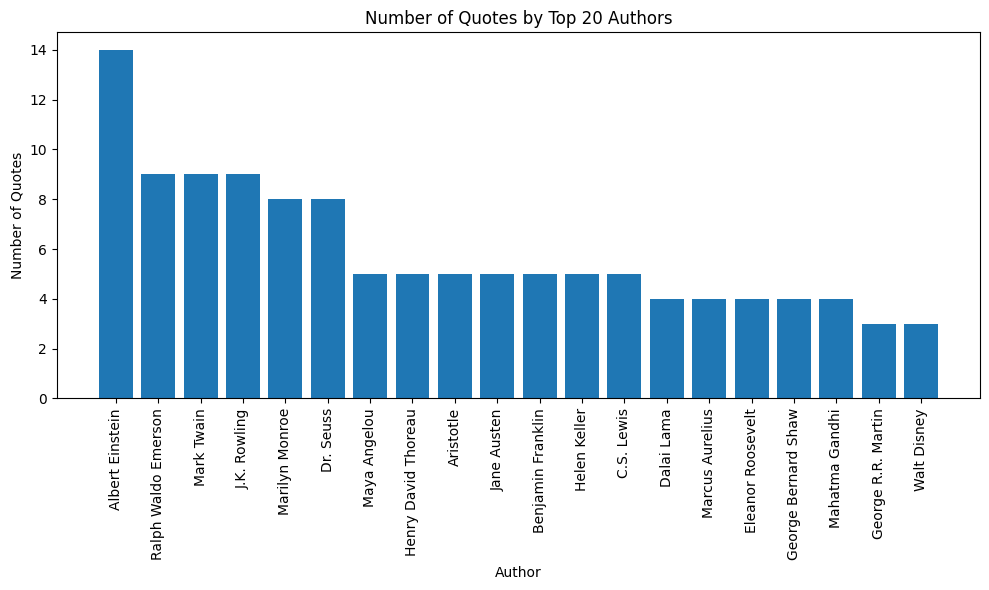

In [15]:
#@title Bargraph - Author & Quote

# Using matplotlib to get the Bar Graph
# author_counts = combined_df_final['Author'].value_counts()
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(top_20_authors.index, top_20_authors.values)
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.title("Number of Quotes by Top 20 Authors")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [26]:
#@title Percentage of how many quotes the top 20 Authors wrote from the total no. quotes

# Getting the number of quotes for the topo 20 authors
quotes_top20 = top_20_authors.values
# print(quotes_top20)

# Getting the sum
sum_of_quotes_top20 = quotes_top20.sum()
# print(sum_of_quotes_top20)

# Printing the percent rounded off till the last 2 decimal points
print ("{:.2%}".format(sum_of_quotes_top20 / rows))


34.50%
